### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데이터 : fish.csv
- 피쳐/특성 : 무게
- 라벨/타겟 : 길이
- 학습 방법 : 지도학습 + 예측 => KNN기반의 회귀
- 학습/테스트 데이터 : 7:3 준비

In [268]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [269]:
fishDF = pd.read_csv('../data/fish.csv', usecols=[0,1,2])
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [270]:
perchDF = fishDF[fishDF.Species == 'Perch']
perchDF.reset_index(drop= True, inplace = True)

In [271]:
perchDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [272]:
targetSR = perchDF['Length']
featureDF = perchDF[['Weight']]

In [273]:
# 항상 shape 확인해라
targetSR.shape, featureDF.shape

((56,), (56, 1))

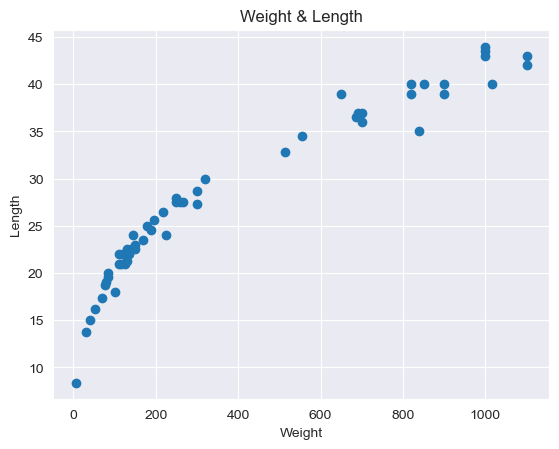

In [274]:
plt.scatter(featureDF, targetSR)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.title('Weight & Length')
plt.show()

In [275]:
x_train,x_test,y_train,y_test = train_test_split(featureDF,targetSR,test_size=0.3,random_state=4)
# 동일한 random_state를 사용하면 항상 동일한 데이터가 생성

### 모델 학습

In [277]:
max_k = x_train.shape[0]

test_scoreList = []
train_scoreList = []

for k in range(1, max_k+1):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    
    train_scoreList.append(model.score(x_train, y_train))
    test_scoreList.append(model.score(x_test, y_test))
max_idx = test_scoreList.index(max(test_scoreList))+1
K = max_idx
print(f'max_score : {max(test_scoreList)}')
print(f'k value : {max_idx}')

max_score : 0.9764875423791555
k value : 7


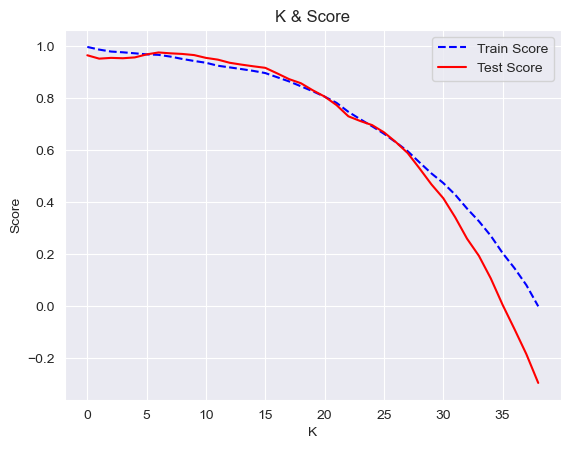

In [278]:
# K 갯수에  따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, "b--", label = "Train Score")
plt.plot(test_scoreList, "r-", label = "Test Score")
plt.title("K & Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.show()

In [279]:
model = KNeighborsRegressor(n_neighbors=K)

In [280]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

### 성능 평가
- 제대로 만들어진 모델인지 확인하는 과정
    * 훈련용 데이터에 대한 점수
    * 테스트용 데이터에 대한 점수
    * 훈련 점수와 테스트 점수 비교  
        * 훈련점수 > 테스트 점수 : 과대적합(Overfitting)
        * 훈련점수 ≒ 테스트 점수 ( 3점 차이 내외 ) : 최적적합(Optimalfititng)
        * 훈련점수 ▼, 테스트 점수 ▼ : 과소적합(Underfitting)

In [282]:
# 과소적합 확인
# 회귀모델에서 score는 결정계수 반환
train_score = model.score(x_train,y_train) 
test_score = model.score(x_test,y_test)
train_score, test_score

(0.967328434861121, 0.9764875423791555)

In [283]:
y_pre = model.predict(x_test)

In [298]:
r2 = r2_score(y_test, y_pre)

In [293]:
MSE = mean_squared_error(y_test, y_pre)

In [295]:
# RMSE ====> +-2.02 정도의 오차가 있다!
RMSE = mean_squared_error(y_test, y_pre, squared=False)

In [296]:
MAE = mean_absolute_error(y_test,y_pre)

In [297]:
print(f'''
[모델 설명도]\nR2 : {r2}\n[에러]\nMAE : {MAE}\nMSE : {MSE}\nRMSE : {RMSE}\n
''')


[모델 설명도]
R2 : 0.9764875423791555
[에러]
MAE : 0.8159663865546226
MSE : 1.0468787515006017
RMSE : 1.0231709297573899


### 예측

In [290]:
new_weight = float(input('무게 입력:'))
newdata = pd.DataFrame([[new_weight]], columns=['Weight'])
new_pre = model.predict(newdata)

print(f'무게가 {new_weight}일 때, 길이가 {new_pre[0]}일 확률의 결정계수는 {r2}이다.')
print(f'test_score가 {test_score}이고, train_score가 {train_score}로, 최적적합 ^^')


무게가 400.0일 때, 길이가 28.75714285714286일 확률의 결정계수는 0.9764875423791555이다.
test_score가 0.9764875423791555이고, train_score가 0.967328434861121로, 최적적합 ^^
